In [232]:
import os
import pandas as pd
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to C:\Users\roel
[nltk_data]     cantu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [233]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [234]:
# Read your api key environment variable
news_api = os.getenv("XXXXXXX")


edc0c9c0a794424c9a9b12f1442e359b


In [235]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api)

In [236]:
# Fetch the Bitcoin news articles
def news_dataframe(topic):
    news = newsapi.get_everything(q ="{topic}", 
                domains = "bbc.co.uk, techcrunch.com",
                from_param ="2019-12-13",
                to = "2020-01-13",
                language = "en",
                sort_by = "relevancy",
                page=2)
    
    
    articles = []
    for article in news ["articles"]:
        try:
            sentiment = sid.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date= article["publishedAt"][:10]
            
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": sentiment["compound"],
                "positive": sentiment["pos"],
                "negative": sentiment["neg"],
                "neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
        
    return pd.DataFrame(articles)


In [237]:
# Fetch the Ethereum news articles
ethereum_articles = news_dataframe("ethereum")
bitcoin_articles = news_dataframe("bitcoin")

In [238]:
bitcoin_articles.head()

,compound,date,description,negative,neutral,positive,text,title
0,0.5719,2019-12-18,The stories behind Christmas decorations that ...,0.000,0.598,0.402,Image copyrightJo BullwinkelImage caption\r\n ...,The Christmas decorations with special meanings
1,0.0000,2019-12-13,The rapper discussed the UK election results d...,0.000,1.000,0.000,Image copyrightGetty Images\r\nStormzy has sai...,Stormzy: General election result feels like a ...
2,0.0000,2019-12-13,Rother Valley turned to the Tories for the fir...,0.000,1.000,0.000,"Image caption\r\n ""I think now we just have to...",General election 2019: Rother Valley voters on...
3,0.0000,2019-12-13,Do you have a question about the election resu...,0.000,1.000,0.000,The election results are in but what else do y...,General election 2019: What questions do you h...
4,-0.7269,2019-12-30,The activist's father says he thought her skip...,0.303,0.697,0.000,Image copyrightREUTERS/Guglielmo Mangiapane\r\...,"Greta Thunberg's father: 'She is happy, but I ..."


In [239]:
# Create the ethereum sentiment scores DataFrame
ethereum_articles.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.098285,0.070700,0.827250,0.102050
std,0.449327,0.114965,0.150106,0.126666
min,-0.726900,0.000000,0.538000,0.000000
25%,-0.087650,0.000000,0.728000,0.000000
50%,0.000000,0.000000,0.838000,0.073000
75%,0.421500,0.085000,0.980500,0.159500
max,0.872000,0.303000,1.000000,0.402000


In [240]:
# Describe the Bitcoin Sentiment
bitcoin_articles.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.098285,0.070700,0.827250,0.102050
std,0.449327,0.114965,0.150106,0.126666
min,-0.726900,0.000000,0.538000,0.000000
25%,-0.087650,0.000000,0.728000,0.000000
50%,0.000000,0.000000,0.838000,0.073000
75%,0.421500,0.085000,0.980500,0.159500
max,0.872000,0.303000,1.000000,0.402000


In [241]:
# Describe the Ethereum Sentiment
ethereum_articles.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.098285,0.070700,0.827250,0.102050
std,0.449327,0.114965,0.150106,0.126666
min,-0.726900,0.000000,0.538000,0.000000
25%,-0.087650,0.000000,0.728000,0.000000
50%,0.000000,0.000000,0.838000,0.073000
75%,0.421500,0.085000,0.980500,0.159500
max,0.872000,0.303000,1.000000,0.402000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [242]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [243]:
# Expand the default stop words list if necessary

In [244]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words("english"))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
   


In [245]:
# Create a new tokens column for bitcoin
article = bitcoin_articles["description"]
tokenizer(article)

TypeError: expected string or bytes-like object

In [246]:
# Create a new tokens column for ethereum
article = ethereum_articles["description"]
tokenizer(article)

TypeError: expected string or bytes-like object

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [247]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [248]:
def process_text(doc):
    sw = set(stopwords.words("english"))
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub("", doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus):
    long_string = " ".join(corpus)
    processed = process_text(long_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=["bigram", "count"])

def word_count(corpus):
    long_string = " ".join(corpus)
    processed = process_text(long_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=["word","count"])

In [249]:
# Generate the Bitcoin N-grams where N=2
corpus = bitcoin_articles["description"]
bigram_counter(corpus)

,bigram,count


In [250]:
# Generate the Ethereum N-grams where N=2
corpus = ethereum_articles["description"]
bigram_counter(corpus)

,bigram,count


In [251]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    #return Counter(tokens).most_common(N)
    long_string = "".join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=["word","count"])

In [252]:
# Get the top 10 words for Bitcoin
tokens = bitcoin_articles["description"]
token_count(tokens, N=10)

,word,count
0,thestoriesbehindchristmasdecorationsthatholdse...,1


In [253]:
# Get the top 10 words for Ethereum
tokens = ethereum_articles["description"]
token_count(tokens, N=10)

,word,count
0,thestoriesbehindchristmasdecorationsthatholdse...,1


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [254]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [255]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\roel
[nltk_data]     cantu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

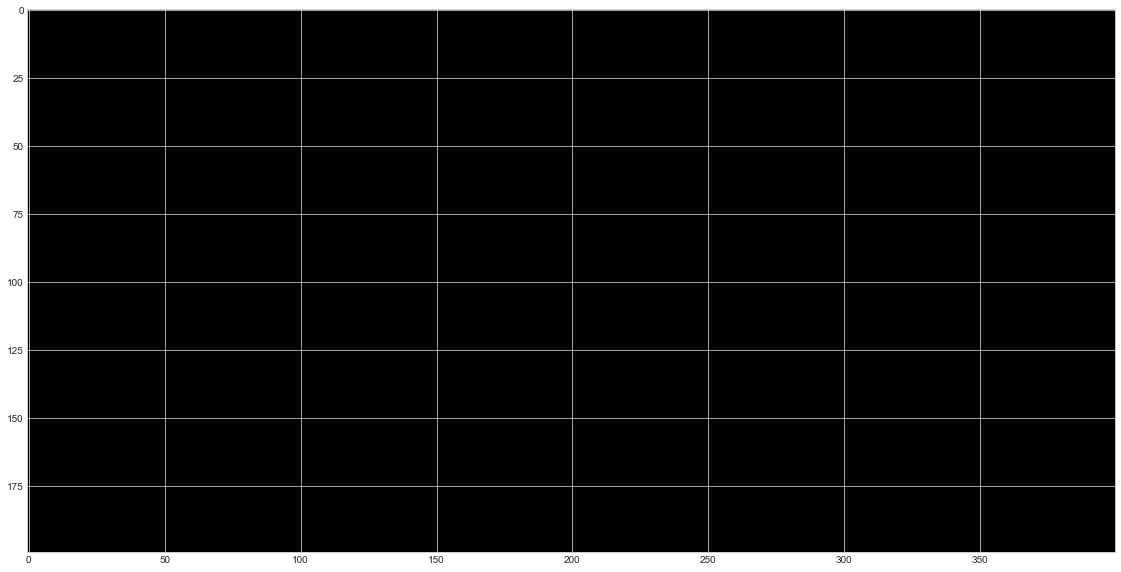

In [256]:
# Generate the Bitcoin word cloud
corpus = bitcoin_articles["description"]

def process_text(doc):
    sw = set(stopwords.words("english"))
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub("", doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return " ". join(output)

long_string = " ".join(corpus)
input_text = process_text(big_string)

wc= WordCloud().generate(input_text)
plt.imshow(wc)

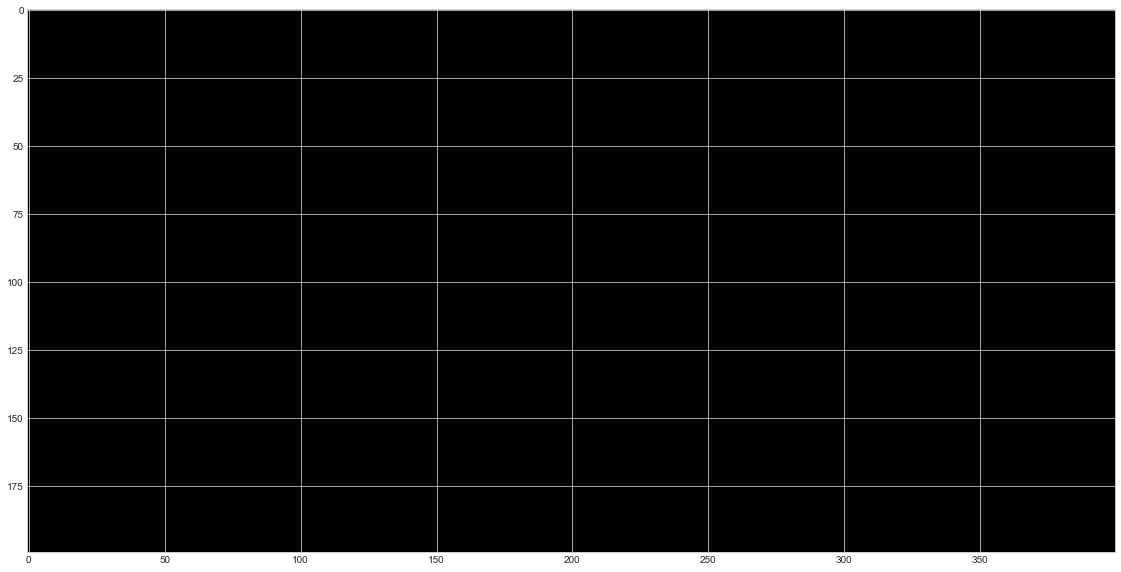

In [257]:
# Generate the Ethereum word cloud
corpus = ethereum_articles["description"]

big_string = " ".join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [258]:
import spacy
from spacy import displacy

In [259]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [260]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [261]:
# Concatenate all of the bitcoin text together
article = ethereum_articels["description"].str.cat()

NameError: name 'ethereum_articels' is not defined

In [ ]:
# Run the NER processor on all of the text
doc = nlp(article)
# Add a title to the document

In [ ]:
# Render the visualization
displacy.render(doc, style="ent")

In [ ]:
# List all Entities
print([ent.text fro ent in doc.ent in ent.label_ == "GPE"])

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
article = bitcoin_articles["description"].str.cat()

In [ ]:
# Run the NER processor on all of the text
doc = nlp(articel)
# Add a title to the document

In [ ]:
# Render the visualization
displacy.render(doc, style="ent")

In [ ]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == "GPE"])